In [2]:
from imports import *

In [33]:
def main(base_folder, local_path,*args,**kwargs):
    bk.load.current_session_linux(base_folder, local_path)
    states = bk.load.states(True)
    states.pop('wake')
    states.pop('drowsy')

    durations = {}
    for state,inter in states.items():
        durations[state] = inter.duration('s')
    return durations

def merge(batch_data):
    df = pd.DataFrame(batch_data)

    durations = {}
    for state in df.index:
        durations[state] = np.concatenate(pd.DataFrame(batch_data).loc[state].values)
    return durations

def plot_log(batch_data):
    durations = merge(batch_data)
    logbins = np.geomspace(1,10_000,50)
    
    fig,ax = plt.subplots(2,1,dpi = 180,sharex = True)
    for state in durations:
        n,bins,_ = ax[0].hist(durations[state],bins = logbins,alpha = 0.7)
        ax[1].plot(np.convolve(bins,[0.5,0.5],'same')[1:],n)
    fig.legend(durations.keys())
    ax[0].semilogx()
    return durations

def plot_linear(batch_data,limits,xlim):
    durations = merge(batch_data)

    fig,ax = plt.subplots(3,1,dpi = 180)

    for i,state in enumerate(durations):
        bins = np.linspace(0,xlim[state],200)

        n,bins,_ = ax[i].hist(durations[state],bins = bins,alpha = 0.7)
        ax[i].set_title(state)
        ax[i].axvline(limits[state])
        ax[i].set_xlim(0,xlim[state])
    plt.tight_layout()


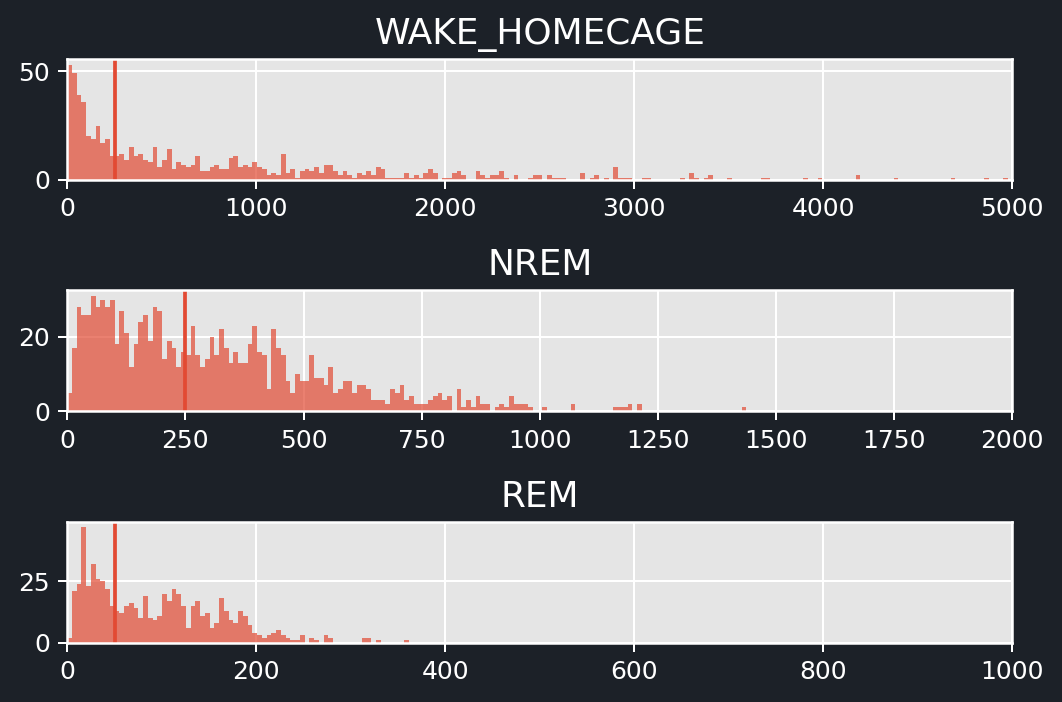

In [34]:
# batch_data, batch_metadata = bk.load.batch(main)


limits = {'REM': 50,
          'NREM': 250,
          'WAKE_HOMECAGE': 250}
xlim = {'REM': 1000,
        'NREM': 2000,
        'WAKE_HOMECAGE': 5000}
durations = plot_linear(batch_data,limits,xlim)
